# <img style="float: left; padding-right: 10px; width: 45px" src="https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/styles/iacs.png"> CS109A Introduction to Data Science

Trees, Bagging, Random Forests, and Boosting


**Harvard University**<br/>
**Fall 2020**<br/>
**Instructors**: Pavlos Protopapas, Kevin Rader and Chris Tanner

<hr style="height:2pt">



In [641]:
import requests
from IPython.core.display import HTML, display
styles = requests.get("https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/styles/cs109.css").text
HTML(styles)

In [642]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import cross_val_score
from sklearn.utils import resample
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score

%matplotlib inline

import seaborn as sns
sns.set(style='whitegrid')
pd.set_option('display.width', 1500)
pd.set_option('display.max_columns', 100)

# Higgs Boson Discovery

The discovery of the Higgs boson in July 2012 marked a fundamental breakthrough in particle physics. The Higgs boson particle was discovered through experiments at the Large Hadron Collider at CERN, by colliding beams of protons at high energy. A key challenge in analyzing the results of these experiments is to differentiate between collisions that produce Higgs bosons and collisions that produce only background noise. 

You are provided with data from Monte-Carlo simulations of collisions of particles in a particle collider experiment. The training set is available in `Higgs_train.csv` and the test set is in `Higgs_test.csv`. Each row in these files corresponds to a particle collision described by 28 features (columns 1-28), of which the first 21 features are kinematic properties measured by the particle detectors in the accelerator, and the remaining features are derived by physicists from the first 21 features. The class label is provided in the last column, with a label of 1 indicating that the collision produces Higgs bosons (signal), and a label of 0 indicating that the collision produces other particles (background).

The data set provided to you is a small subset of the HIGGS data set in the UCI machine learning repository. The following paper contains further details about the data set and the predictors used: [Baldi et al., Nature Communications 5, 2014](https://www.nature.com/articles/ncomms5308).

In [643]:
data_train = pd.read_csv('data/Higgs_train.csv')
data_test = pd.read_csv('data/Higgs_test.csv')

print(f"{len(data_train)} training samples, {len(data_test)} test samples")
print("\nColumns:")
print(', '.join(data_train.columns))

5000 training samples, 5000 test samples

Columns:
lepton pT, lepton eta, lepton phi, missing energy magnitude, missing energy phi, jet 1 pt, jet 1 eta, jet 1 phi, jet 1 b-tag, jet 2 pt, jet 2 eta, jet 2 phi, jet 2 b-tag, jet 3 pt, jet 3 eta, jet 3 phi, jet 3 b-tag, jet 4 pt, jet 4 eta, jet 4 phi, jet 4 b-tag, m_jj, m_jjj, m_lv, m_jlv, m_bb, m_wbb, m_wwbb, class


In [644]:
display(data_train.head())
display(data_train.describe())

,lepton pT,lepton eta,lepton phi,missing energy magnitude,missing energy phi,jet 1 pt,jet 1 eta,jet 1 phi,jet 1 b-tag,jet 2 pt,jet 2 eta,jet 2 phi,jet 2 b-tag,jet 3 pt,jet 3 eta,jet 3 phi,jet 3 b-tag,jet 4 pt,jet 4 eta,jet 4 phi,jet 4 b-tag,m_jj,m_jjj,m_lv,m_jlv,m_bb,m_wbb,m_wwbb,class
0,0.377,-1.5800,-1.7100,0.991,0.114,1.250,0.620,-1.480,2.17,0.754,0.7750,-0.667,2.21,1.280,-1.190,0.505,0.00,1.110,-0.464,0.397,0.00,0.522,1.320,0.982,1.360,0.965,1.310,1.080,1.0
1,0.707,0.0876,-0.4000,0.919,-1.230,1.170,-0.553,0.886,2.17,1.300,0.7620,-1.060,2.21,0.607,0.459,1.020,0.00,0.497,0.956,0.236,0.00,0.440,0.829,0.992,1.160,2.220,1.190,0.938,1.0
2,0.617,0.2660,-1.3500,1.150,1.040,0.955,0.377,-0.148,0.00,1.060,-0.0194,1.110,0.00,1.470,0.205,-1.060,2.55,1.490,-0.398,-0.542,0.00,1.020,1.030,0.986,0.928,1.370,0.982,0.917,1.0
3,0.851,-0.3810,-0.0713,1.470,-0.795,0.692,0.883,0.497,0.00,1.620,0.1240,1.180,1.11,1.290,0.160,-0.916,2.55,0.945,0.796,-1.520,0.00,1.200,1.100,0.987,1.350,1.460,0.995,0.954,1.0
4,0.768,-0.6920,-0.0402,0.615,0.144,0.749,0.397,-0.874,0.00,1.150,0.1270,1.320,2.21,0.730,-0.758,-1.120,0.00,0.848,0.107,0.502,1.55,0.922,0.864,0.983,1.370,0.601,0.919,0.957,0.0


,lepton pT,lepton eta,lepton phi,missing energy magnitude,missing energy phi,jet 1 pt,jet 1 eta,jet 1 phi,jet 1 b-tag,jet 2 pt,jet 2 eta,jet 2 phi,jet 2 b-tag,jet 3 pt,jet 3 eta,jet 3 phi,jet 3 b-tag,jet 4 pt,jet 4 eta,jet 4 phi,jet 4 b-tag,m_jj,m_jjj,m_lv,m_jlv,m_bb,m_wbb,m_wwbb,class
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.978645,-0.014280,-0.018956,1.005793,0.002528,0.980390,0.025014,-0.007104,0.993678,0.988659,-0.010310,-0.006926,1.006922,0.997004,0.018817,0.003952,1.011994,0.982806,0.005201,0.003349,1.007810,1.038431,1.027201,1.054719,1.023094,0.958464,1.033432,0.960494,0.524600
std,0.547025,1.011927,0.997945,0.591907,1.003337,0.463677,1.002018,1.014559,1.028920,0.476462,1.007983,1.002177,1.045206,0.471681,1.007824,0.999656,1.200416,0.497681,1.007999,1.008904,1.400846,0.619460,0.353984,0.173243,0.427141,0.495720,0.352966,0.306057,0.499444
min,0.275000,-2.410000,-1.740000,0.010000,-1.740000,0.170000,-2.920000,-1.740000,0.000000,0.198000,-2.910000,-1.740000,0.000000,0.265000,-2.720000,-1.740000,0.000000,0.366000,-2.500000,-1.740000,0.000000,0.151000,0.443000,0.339000,0.371000,0.079500,0.413000,0.452000,0.000000
25%,0.587000,-0.764250,-0.877500,0.581000,-0.870000,0.676000,-0.659250,-0.885000,0.000000,0.666000,-0.699000,-0.859500,0.000000,0.664750,-0.679250,-0.858000,0.000000,0.619000,-0.707250,-0.869250,0.000000,0.798750,0.850000,0.986000,0.768000,0.672000,0.826000,0.772750,0.000000
50%,0.846000,-0.009305,-0.016050,0.903500,0.001300,0.891000,0.049500,-0.023500,1.090000,0.891000,-0.004800,-0.030700,1.110000,0.899500,0.045700,0.018800,0.000000,0.877000,0.012900,-0.004700,0.000000,0.898000,0.957000,0.990000,0.922000,0.868000,0.952000,0.877500,1.000000
75%,1.220000,0.725500,0.837000,1.300000,0.866000,1.160000,0.716000,0.894000,2.170000,1.192500,0.692250,0.855500,2.210000,1.232500,0.717000,0.855000,2.550000,1.220000,0.719000,0.859000,3.100000,1.030000,1.090000,1.030000,1.160000,1.120000,1.140000,1.060000,1.000000
max,5.330000,2.430000,1.740000,6.260000,1.740000,4.190000,2.960000,1.740000,2.170000,4.800000,2.910000,1.740000,2.210000,4.630000,2.730000,1.740000,2.550000,5.770000,2.490000,1.740000,3.100000,10.600000,5.740000,3.940000,6.220000,5.080000,4.320000,3.500000,1.000000


In [645]:
# Split into NumPy arrays
X_train = data_train.iloc[:, data_train.columns != 'class'].values
y_train = data_train['class'].values
X_test = data_test.iloc[:, data_test.columns != 'class'].values
y_test = data_test['class'].values

## Answers

<div class='exercise-r'>  
 
**1.1** We will observe how both tree-depth and cross-validation affect our ability to accurately model data. Specifically, using tree depths from 1 to 20 (inclusive):


In [839]:
depths = list(range(1, 21))

cvmeans = []
cvstds = []
train_scores = []

def calc_meanstd(X_train, y_train, depths):
    
    for i in depths:
        
        tree = DecisionTreeClassifier(max_depth=i).fit(X_train,y_train)
        train_scores.append(tree.score(X_train,y_train)*100)
       
        cv = cross_val_score(estimator=tree, X=X_train, y=y_train, cv=10)
        cvmeans.append(cv.mean()*100)
        cvstds.append(cv.std()*100)
        
    return cvmeans, cvstds, train_scores

cvmeans, cvstds, train_scores= calc_meanstd(X_train, y_train, depths)

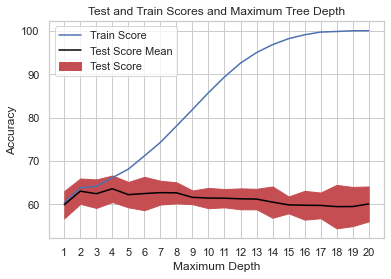

In [840]:
cvmeans = np.array(cvmeans)
cvstds = np.array(cvstds)

lower = []
upper = []

lower = cvmeans - 2*cvstds
upper = cvmeans + 2*cvstds
    
plt.plot(depths,train_scores,color='b', label='Train Score')
plt.plot(depths,cvmeans,label='Test Score Mean',color='black')
plt.fill_between(depths,lower,upper,color='r',label='Test Score')
plt.xticks(depths);
plt.title('Test and Train Scores and Maximum Tree Depth')
plt.xlabel('Maximum Depth')
plt.ylabel('Accuracy')
plt.legend()

<div class='exercise-r'>  
 
**1.2** Using the cross-validation experiments from above, we select a depth we deem most appropriate for using on future, unseen data.
 
 </div>

In [841]:
for i in range(len(cvmeans)):
    if (cvmeans[i] == max(cvmeans)):
        best_depth = i+1

best_tree = DecisionTreeClassifier(max_depth=best_depth).fit(X_train,y_train)

best_cv_tree_train_score , best_cv_tree_test_score = round(best_tree.score(X_train,y_train)*100,2), round(best_tree.score(X_test,y_test)*100,2)

In [842]:
best_cv_tree_train_score , best_cv_tree_test_score

(66.14, 65.1)

<div class='exercise-r'>  
 
**2.1** Using decision trees and the previous question's data, we choose a tree depth that WILL overfit the training set.
 
 </div>

In [843]:
# Assign variable named tree_depth

tree_depth = 20


For tree_depth = 20, the train score is 100% and the test score is very low, so it is fair to say that this depth overtfits the data

<div class='exercise-r'>  
 
**2.2** We create 55 bootstrapped replications of the original training data and fit a decision tree to each (using the tree depth you just chose in 2.1). We Record each of the 55 trees' predictions. In particular, 
 </div>

In [874]:
def bootstrap(df):
    selectionIndex = np.random.randint(len(df), size = len(df))
    new_df = df.iloc[selectionIndex]
    return new_df

def bagger(n_trees: int, tree_depth: int,  random_seed=0) -> (pd.DataFrame, pd.DataFrame, list):
    """A function that takes as 
    
    Inputs:
      n_tres
      tree_depth 
      a random_seed (default =0)
    
    Returns:
      bagging_train dataframe (as described above)
      bagging_test dataframe (as described above)
      bagging_models every trained model for each bootstrap (you will need this in Q3.2)
    """
    predict_train = []
    predict_test = []
    bagging_models = []
    
    column_names = []
    
    row_train = []
    row_test = []
    
    for i in range(5000):
        row_train.append('Training row ' + str(i+1))
        row_test.append('Test row ' + str(i+1))
        
    for i in range(n_trees):
        
        new_df = bootstrap(data_train)
        
        X_boot = new_df.iloc[:, new_df.columns != 'class'].values
        y_boot = new_df['class'].values
        
        tree = DecisionTreeClassifier(max_depth = tree_depth).fit(X_boot,y_boot)
        
        bagging_models.append(tree)
        
        y_pred_train = tree.predict(X_train)
        y_pred_test = tree.predict(X_test)
        
        predict_train.append(y_pred_train)
        predict_test.append(y_pred_test)
        
        column_names.append("bootstrap model " + str(i+1) + "\'s prediction")
        
    bagging_train_df = pd.DataFrame(predict_train).transpose()   
    bagging_test_df = pd.DataFrame(predict_test).transpose()
    
    bagging_train_df.columns = column_names
    bagging_train_df.index = row_train
    
    bagging_test_df.columns = column_names
    bagging_test_df.index = row_test
    
    return bagging_train_df, bagging_test_df, bagging_models


In [875]:

bagging_train_df, bagging_test_df, bagging_models = bagger(55,20,0)


In [876]:
bagging_train_df

,bootstrap model 1's prediction,bootstrap model 2's prediction,bootstrap model 3's prediction,bootstrap model 4's prediction,bootstrap model 5's prediction,bootstrap model 6's prediction,bootstrap model 7's prediction,bootstrap model 8's prediction,bootstrap model 9's prediction,bootstrap model 10's prediction,bootstrap model 11's prediction,bootstrap model 12's prediction,bootstrap model 13's prediction,bootstrap model 14's prediction,bootstrap model 15's prediction,bootstrap model 16's prediction,bootstrap model 17's prediction,bootstrap model 18's prediction,bootstrap model 19's prediction,bootstrap model 20's prediction,bootstrap model 21's prediction,bootstrap model 22's prediction,bootstrap model 23's prediction,bootstrap model 24's prediction,bootstrap model 25's prediction,bootstrap model 26's prediction,bootstrap model 27's prediction,bootstrap model 28's prediction,bootstrap model 29's prediction,bootstrap model 30's prediction,bootstrap model 31's prediction,bootstrap model 32's prediction,bootstrap model 33's prediction,bootstrap model 34's prediction,bootstrap model 35's prediction,bootstrap model 36's prediction,bootstrap model 37's prediction,bootstrap model 38's prediction,bootstrap model 39's prediction,bootstrap model 40's prediction,bootstrap model 41's prediction,bootstrap model 42's prediction,bootstrap model 43's prediction,bootstrap model 44's prediction,bootstrap model 45's prediction,bootstrap model 46's prediction,bootstrap model 47's prediction,bootstrap model 48's prediction,bootstrap model 49's prediction,bootstrap model 50's prediction,bootstrap model 51's prediction,bootstrap model 52's prediction,bootstrap model 53's prediction,bootstrap model 54's prediction,bootstrap model 55's prediction
Training row 1,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
Training row 2,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0
Training row 3,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0
Training row 4,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0
Training row 5,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Training row 4996,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
Training row 4997,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
Training row 4998,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0
Training row 4999,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1

In [877]:
bagging_test_df


,bootstrap model 1's prediction,bootstrap model 2's prediction,bootstrap model 3's prediction,bootstrap model 4's prediction,bootstrap model 5's prediction,bootstrap model 6's prediction,bootstrap model 7's prediction,bootstrap model 8's prediction,bootstrap model 9's prediction,bootstrap model 10's prediction,bootstrap model 11's prediction,bootstrap model 12's prediction,bootstrap model 13's prediction,bootstrap model 14's prediction,bootstrap model 15's prediction,bootstrap model 16's prediction,bootstrap model 17's prediction,bootstrap model 18's prediction,bootstrap model 19's prediction,bootstrap model 20's prediction,bootstrap model 21's prediction,bootstrap model 22's prediction,bootstrap model 23's prediction,bootstrap model 24's prediction,bootstrap model 25's prediction,bootstrap model 26's prediction,bootstrap model 27's prediction,bootstrap model 28's prediction,bootstrap model 29's prediction,bootstrap model 30's prediction,bootstrap model 31's prediction,bootstrap model 32's prediction,bootstrap model 33's prediction,bootstrap model 34's prediction,bootstrap model 35's prediction,bootstrap model 36's prediction,bootstrap model 37's prediction,bootstrap model 38's prediction,bootstrap model 39's prediction,bootstrap model 40's prediction,bootstrap model 41's prediction,bootstrap model 42's prediction,bootstrap model 43's prediction,bootstrap model 44's prediction,bootstrap model 45's prediction,bootstrap model 46's prediction,bootstrap model 47's prediction,bootstrap model 48's prediction,bootstrap model 49's prediction,bootstrap model 50's prediction,bootstrap model 51's prediction,bootstrap model 52's prediction,bootstrap model 53's prediction,bootstrap model 54's prediction,bootstrap model 55's prediction
Test row 1,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0
Test row 2,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0
Test row 3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0
Test row 4,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0
Test row 5,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Test row 4996,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
Test row 4997,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
Test row 4998,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
Test row 4999,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0

<div class='exercise-r'>  
 
**2.3**  We aggregate_ all 55 _bootstrapped_ models to get a combined prediction for each training and test point: predict a 1 if and only if a majority of the models predict that example to be from class 1. 
 </div>

In [880]:
avg_train = (bagging_train_df.mean(axis = 1) >= 0.5)*1
avg_test = (bagging_test_df.mean(axis = 1) >= 0.5)*1

bagging_accuracy_train = round(np.mean(avg_train==y_train)*100,2)
print('Bagging Train Accuracy: ' + str(bagging_accuracy_train))

bagging_accuracy_test = round(np.mean(avg_test==y_test)*100,2)
print('Bagging Test Accuracy: ' + str(bagging_accuracy_test))

if (bagging_accuracy_test >= best_cv_tree_test_score):
    print('The bagging test accuracy is at least as good as the accuracy of the previous model')

Bagging Train Accuracy: 99.9
Bagging Test Accuracy: 68.22
The bagging test accuracy is at least as good as the accuracy of the previous model


<div class='exercise-r'>  
 
**2.4** We want to know how the number of bootstraps affects our bagging ensemble's performance. We will use the `running_predictions()` function (given below) to get the model's accuracy score when using only $N$ of the bootstrapped models, where $N \in [1, 2, 3, ..., 55]$.
 </div>

In [241]:
def running_predictions(prediction_dataset: np.ndarray, targets: np.ndarray) -> np.ndarray:
    """A function to predict examples' class via the majority among trees (ties are predicted as 0)
    
    Inputs:
      prediction_dataset - a (n_examples by n_sub_models) dataset (not a dataframe), where each entry [i,j] is sub-model j's prediction
          for example i
      targets - the true class labels
    
    Returns:
      a vector where vec[i] is the model's accuracy when using just the first i+1 sub-models
    """
    
    n_trees = prediction_dataset.shape[1]
    
    # find the running percentage of models voting 1 as more models are considered
    running_percent_1s = np.cumsum(prediction_dataset, axis=1)/np.arange(1,n_trees+1)
    
    # predict 1 when the running average is above 0.5
    running_conclusions = running_percent_1s > 0.5
    
    # check whether the running predictions match the targets
    running_correctnesss = running_conclusions == targets.reshape(-1,1)
    
    return np.mean(running_correctnesss, axis=0)
    # returns a 1-d series of the accuracy of using the first n trees to predict the targets

In [881]:
for i in range(1,56):

    predict_train = []
    predict_test = []
    
    for j in range(1,i+1):
    
        new_df = bootstrap(data_train)

        X_boot = new_df.iloc[:, new_df.columns != 'class'].values
        y_boot = new_df['class'].values
        
        tree = DecisionTreeClassifier(max_depth = tree_depth).fit(X_boot,y_boot)
        
        y_pred_train = tree.predict(X_train)
        y_pred_test = tree.predict(X_test)
        
        predict_train.append(y_pred_train)
        predict_test.append(y_pred_test)
        
    bagging_train_df = pd.DataFrame(predict_train).transpose()  
    bagging_test_df = pd.DataFrame(predict_test).transpose()
    

train_acc = running_predictions(bagging_train_df,y_train)
test_acc = running_predictions(bagging_test_df,y_test)

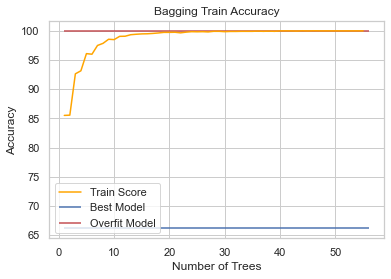

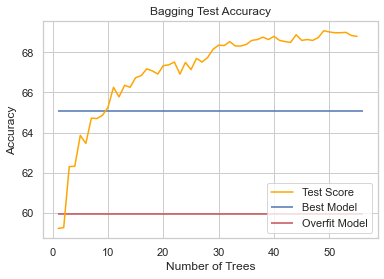

In [882]:
N = list(range(1,56))

best_depth = 20

tree = DecisionTreeClassifier(max_depth=best_depth).fit(X_train,y_train)

train_score , test_score = round(tree.score(X_train,y_train)*100), round(tree.score(X_test,y_test)*100,2)

plt.plot(N,train_acc*100, label='Train Score', color = 'orange')
plt.hlines(best_cv_tree_train_score, 1,56,label='Best Model', color = 'b')
plt.hlines(train_score, 1,56, label = 'Overfit Model', color = 'r')
plt.legend()
plt.xlabel('Number of Trees')
plt.ylabel('Accuracy')
plt.title('Bagging Train Accuracy')
plt.show()

plt.plot(N,test_acc*100,label='Test Score', color = 'orange')
plt.hlines(best_cv_tree_test_score, 1,56,label='Best Model', color = 'b')
plt.hlines(test_score, 1,56,label = 'Overfit Model', color = 'r')
plt.legend()
plt.xlabel('Number of Trees')
plt.ylabel('Accuracy')
plt.title('Bagging Test Accuracy')
plt.show()


* Train Accuracy: 
The bagging train accuracy is about 20% better than that of the Best model. The train accuracy approaches 100% as the number of trees increases. 

* Test Accuracy:
The bagging test accuracy approaches starts with a low percentage (lower than that of the Best Model). However, as the number of trees increases, the bagging test exceeds that of the best model, at number of tree = ~9, then continue to appraoch a percentage of 70%, which is 5% better than the best model's.

Therefore, we can see that for a sufficient number of bootstraps, bagging produces more accurate predictions than the single-tree model.

For a single tree, as the tree depth increases, the model becomes more likely to overfit. We saw this in problem (1) where the train accuracy approached 100%, while the test accuracy reaches a maximum then starts to decline as the tree depth increases. We saw this again in problem (2) when we set max_depth = 20, the train score becomes 100% whereas the test score is relatively low. 

As for bagging, it is still possible to overfit (we can see this in the first graph, where the train score approaches 100%), but the test score is still better than that of a single tree.

<div class='exercise-r'>  
 
**3.1**  We fit a `RandomForestClassifier` to the original `X_train` data using the same tree depth and number of trees we used in 2.2. Set the number of features to use when looking for the best split to be  `sqrt(total_number of features)`. The, we evaluate its accuracy on the test set and assign it to a variable name `random_forest_test_score`.
 
 </div>

In [713]:
forest = RandomForestClassifier(n_estimators=55, max_depth=20, max_features='sqrt').fit(X_train, y_train)

random_forest_train_score = round(forest.score(X_train,y_train)*100,2)
random_forest_test_score = round(forest.score(X_test,y_test)*100,2)

print('Train Accuracy: ' + str(random_forest_train_score))
print('Test Accuracy: ' + str(random_forest_test_score))

Train Accuracy: 99.96
Test Accuracy: 69.02


<div class='exercise-r'>  
 
**3.2** Check how many times is each feature used as the top/first node. 
 </div>

In [883]:
bag_features = []
forest_features = []

for i in bagging_models:   
    bag_features.append(data_train.columns[i.tree_.feature[0]])
    
for i in range(55):
    forest_features.append(data_train.columns[forest.estimators_[i].tree_.feature[0]])

bag_dict = {i:bag_features.count(i) for i in bag_features}
forest_dict = {i:forest_features.count(i) for i in forest_features}

top_predictors_bagging = pd.DataFrame(list(bag_dict.items()), columns = ['Feature', 'Count'])
top_predictors_rf = pd.DataFrame(list(forest_dict.items()), columns = ['Feature', 'Count'])

top_predictors_bagging

,Feature,Count
0,m_bb,55


In [884]:
top_predictors_rf

,Feature,Count
0,lepton pT,6
1,m_jjj,10
2,m_bb,14
3,m_wbb,5
4,missing energy magnitude,5
5,jet 2 eta,2
6,m_wwbb,7
7,m_jlv,2
8,jet 3 eta,3
9,m_jj,1


* For bagging: The process always chooses the strongest predictor (compared to ALL other predictors) to be at the first node, whereas for RF, a group of the predictors is chosen at random, then the strongest predictor in that specific group is chosen to be at the first node. This means that it is not gurunteed that a predictor would be repeated for every iteration, that's why we see a number of different predictors used for RF, and only one predictor for Bagging.


* Accuracies:

1) RF: 

Train Accuracy: 99.96

Test Accuracy: 69.2

2) Bagging: 

Train Accuracy: 99.96

Test Accuracy: 68.48

So we can see that Test accuracy for RF is slightly better than that of bagging, so the performance of RF is better.

<div class='exercise-r'>  
 
**3.3**: We make a Pandas table of the training and test accuracy for the models and name it `results_df`:
 
 </div>

In [886]:
l1 = list(('Single tree with best depth chosen by CV',best_cv_tree_train_score, best_cv_tree_test_score))
l2 = list(('Single depth-X tree', train_score , test_score))
l3 = list(('Bagging 55 depth-X trees', bagging_accuracy_train, bagging_accuracy_test))
l4 = list(('Random Forest of 55 depth-X trees', random_forest_train_score, random_forest_test_score))

l = list((l1,l2,l3,l4))

df = pd.DataFrame(l, columns = ['Classifier', 'Training accuracy', 'Test accuracy'])
df

,Classifier,Training accuracy,Test accuracy
0,Single tree with best depth chosen by CV,66.14,65.10
1,Single depth-X tree,100.00,59.94
2,Bagging 55 depth-X trees,99.90,68.22
3,Random Forest of 55 depth-X trees,99.96,69.02


We can see that the score produced by the single tree with best depth chosen by CV is the lowest, whereas the three other models produce a training accuracy of about 100%. This makes sense considering that we had to limit the depth of the tree in problem (1) in order to have a better testing accuracy, thus preventing the model from overfitting, resulting in a low training score (reducing the bias results in increase of variance).

However, when we chose the tree depth to be 20 with the purpose of overfitting the graph, the training accuracy becomes 100% (as expected), and the testing accuracy becomes the lowerst compared to all other models. This is to be expected given that the model is overfit, resulting in lots of innaccurate predictions (that is, the model is heavily biased, so the variance is very low).

The bagging and RF models are almost exactly the same (RF has slightly higher testing accuracy, so it performs better). They both have almost 100% Training accuracies, but the testing scores are still better than any of the previous models. This indicates that the bias-variance tradeoffs are better for these models than the previous two. 

<div class='exercise-r'>  
 
**4.1** We will motivate AdaBoost by noticing patterns in the errors that a single classifier makes. We fit `tree1`, a decision tree with depth 3, to the training data.
Then, we report the train and test accuracies. 
 </div>

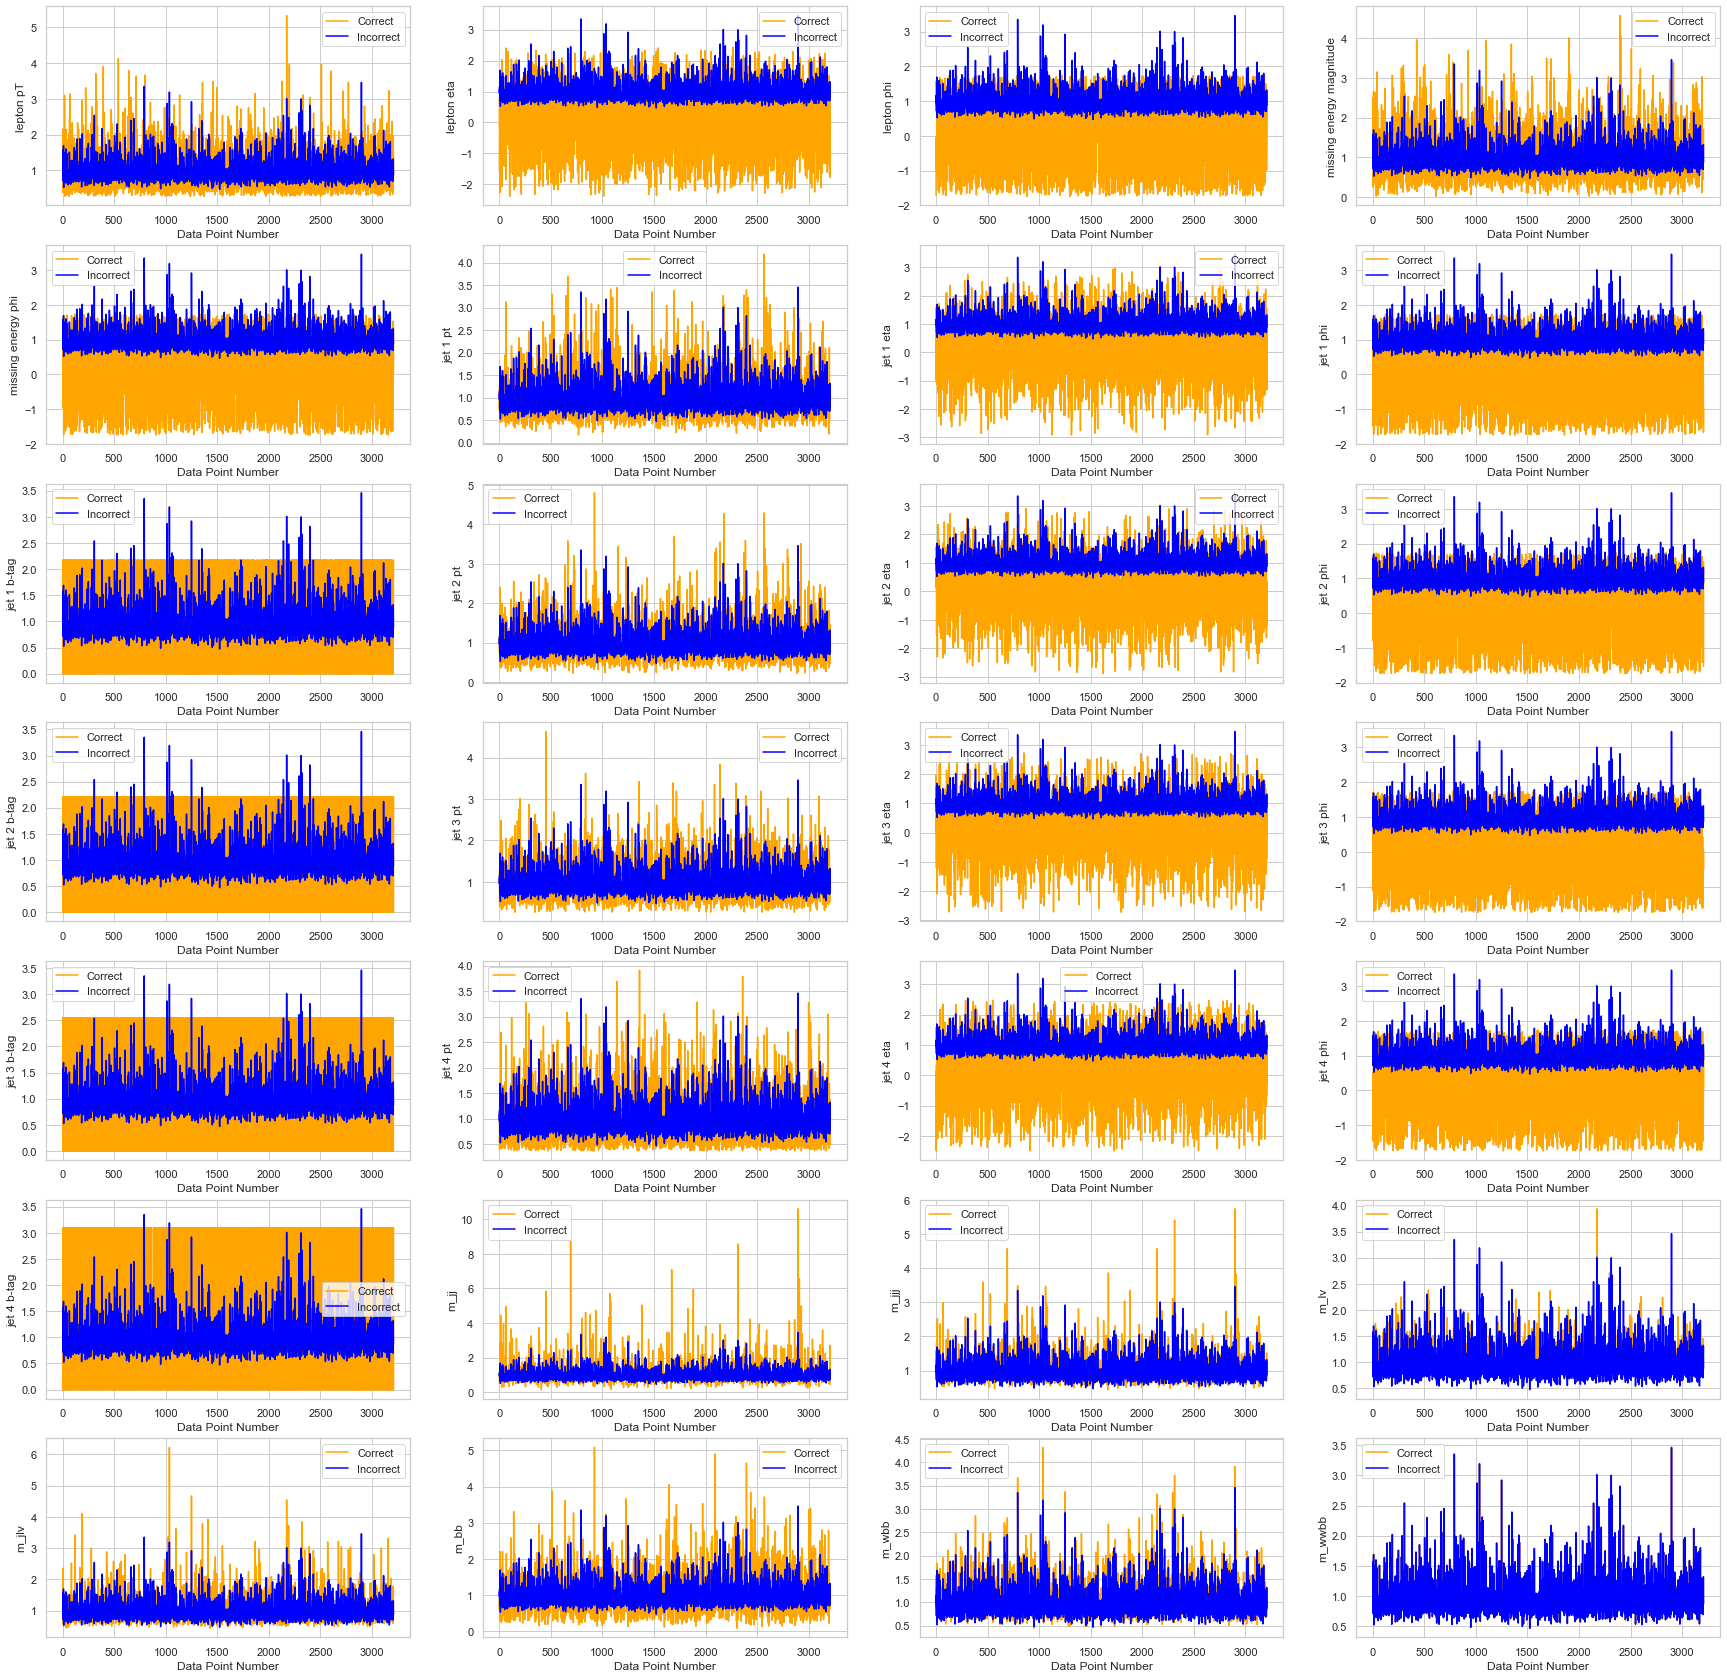

In [777]:
from matplotlib.pyplot import figure

tree1 = DecisionTreeClassifier(max_depth=3).fit(X_train,y_train)

train_score = tree1.score(X_train,y_train)
test_score = tree1.score(X_test,y_test)
    
pred = tree1.predict(X_train)
correct = (pred == y_train)*1

l_correct = []
l_incorrect = []

for i in range(len(correct)):
    if (correct[i] == 1):
        l_correct.append(X_train[i])
    else:
        l_incorrect.append(X_train[i])

predict_corr = []

column1 = []
column2 = []

for j in range(28):
    first_corr = []
    for i in range(len(l_correct)): 
        first_corr.append(l_correct[i][j])
    column1.append(first_corr)  
    
for j in range(28):
    first_incorr = [first_corr]
    for i in range(len(l_incorrect)):
        first_incorr.append(l_incorrect[i][0])
    column2.append(first_corr) 

predictors = list(data_train.columns)

figure(figsize=(30,30))

for i in range(28): 
    
    axs = plt.subplot(7,4,i+1)
    axs.plot(column1[i], color = 'orange', label = 'Correct')
    axs.plot(column2[i], color = 'blue', label = 'Incorrect')
    axs.set_ylabel(predictors[i])
    axs.set_xlabel('Data Point Number')
    #axs.set_title('Difference between correct and incorrect predictions')
    axs.legend()


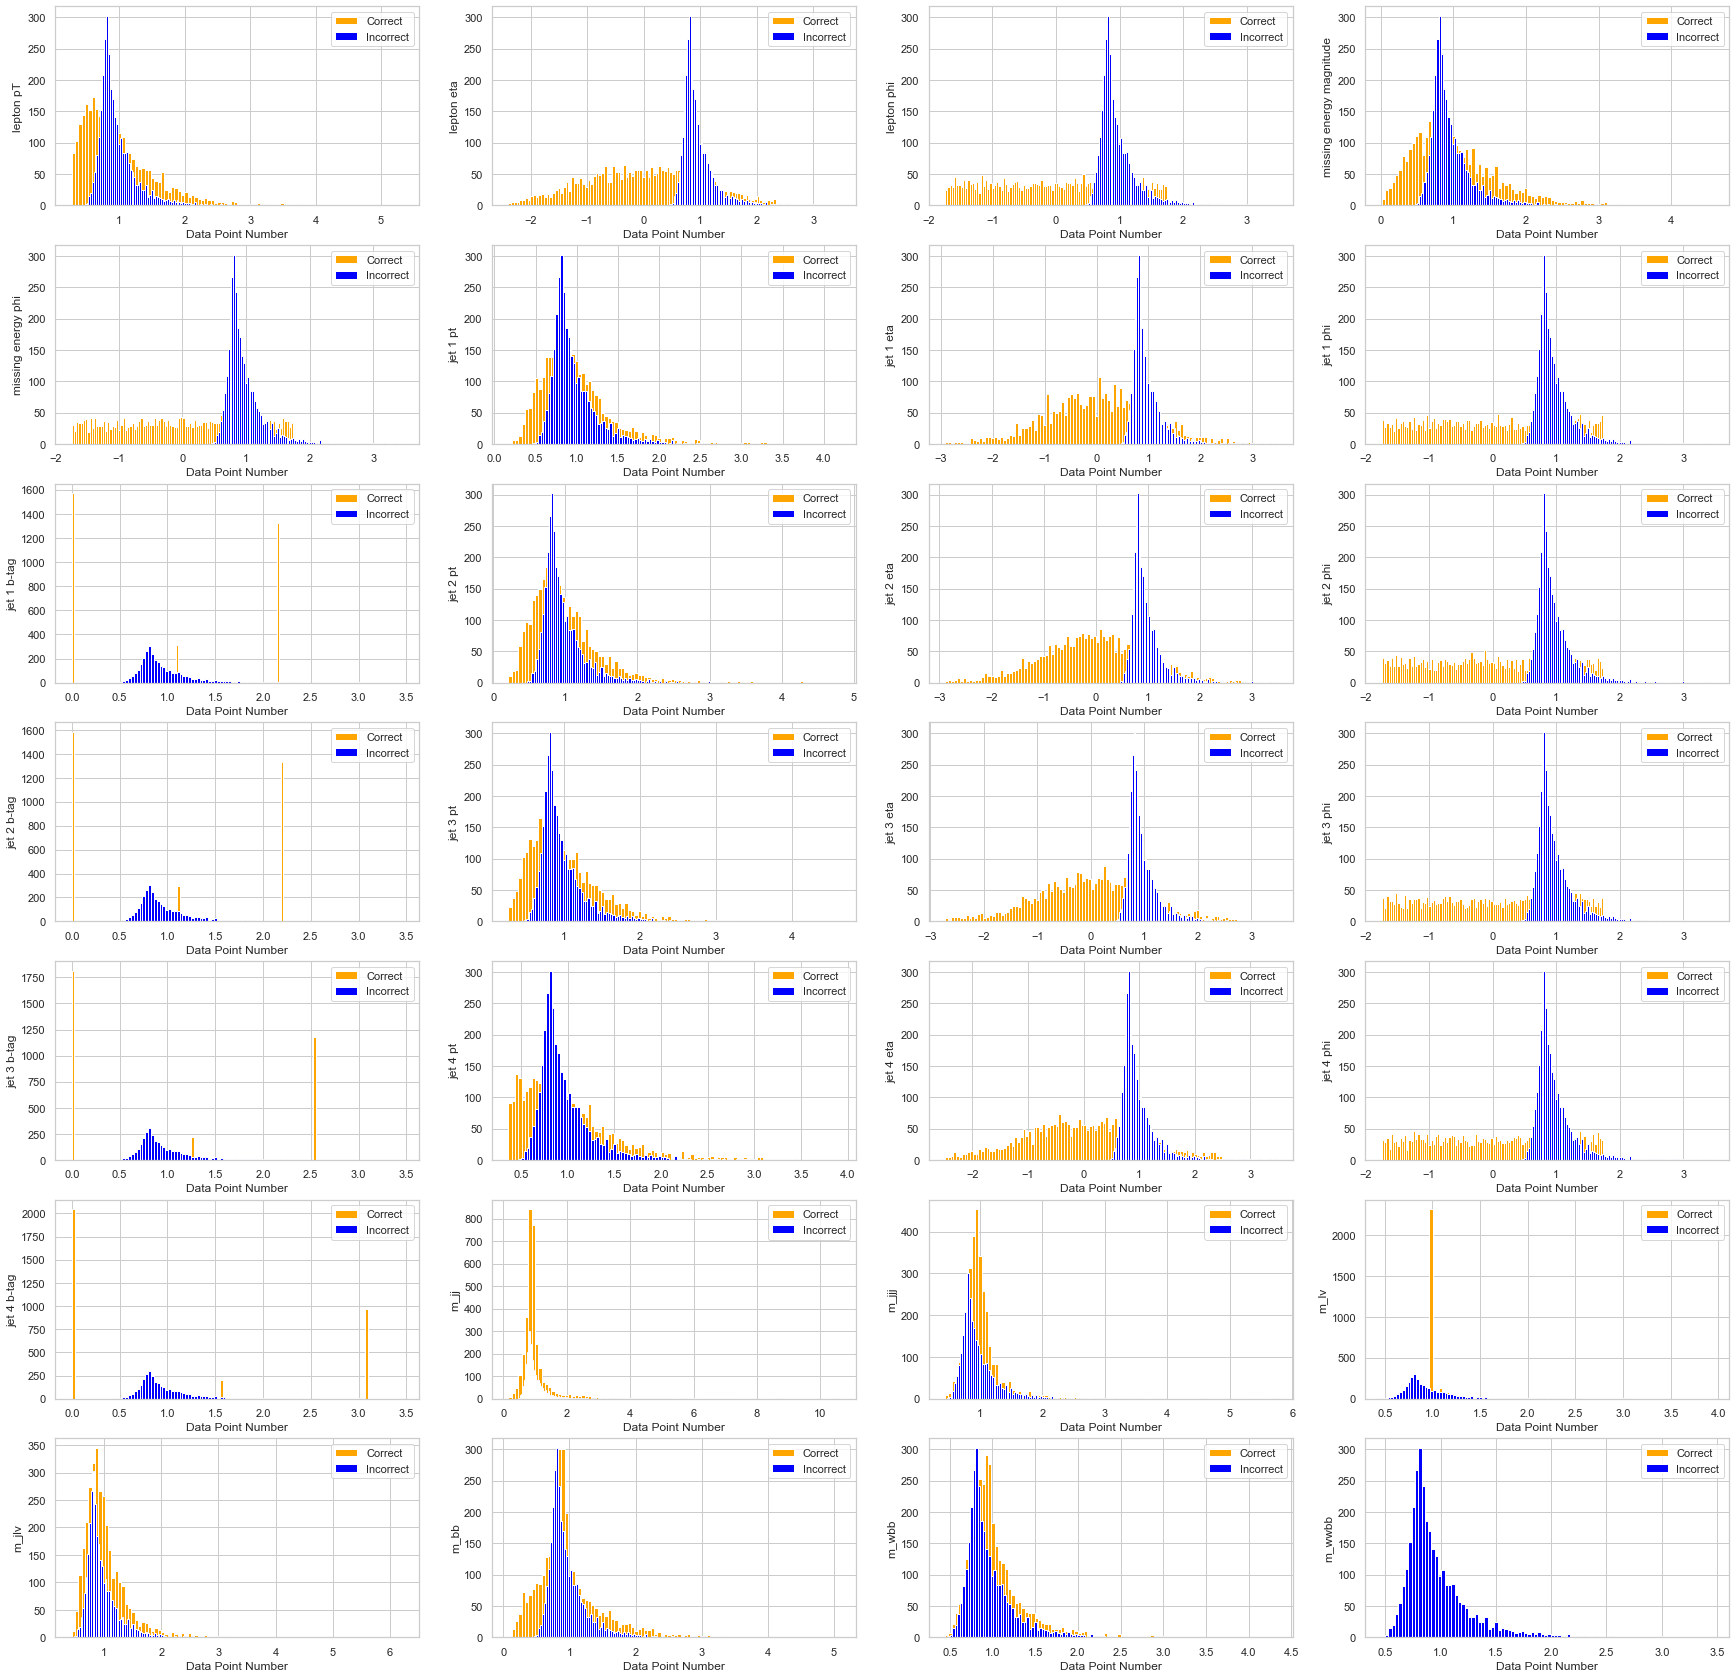

In [778]:
figure(figsize=(30, 30))

for i in range(28): 
    
    axs = plt.subplot(7,4,i+1)
    axs.hist(column1[i], bins = 100, color = 'orange', label = 'Correct')
    axs.hist(column2[i], bins = 100, color = 'blue', label = 'Incorrect')
    axs.set_ylabel(predictors[i])
    axs.set_xlabel('Data Point Number')
    #axs.set_title('Difference between correct and incorrect predictions')
    axs.legend()


In [769]:
print('Boosting Train Score: ' + str(round(train_score*100,2)))
print('Boosting Test Score: ' + str(round(test_score*100,2)))

Boosting Train Score: 64.18
Boosting Test Score: 64.42


Based on the Distribution plots and the histograms, it is evident that the following predictors show different features for correct and incorrect predictions:

Lepton eta, Lepton phi, missing energy phi, jet 1 eta, jet 1 phi, jet 1 b-tag, jet 2 eta, jet 2 phi, jet 2 b-tag, jet 3 eta, jet 3 phi, jet 3 b-tag, jet 4 eta, jet 4 phi, jet 4 b-tag, m_ii

Whereas for other predictors, the distributions are relatively similar 

<div class='exercise-r'>  
 
**4.2** The following code (see below) attempts to implement a simplified version of boosting using just two classifiers (described below).
 
 </div>

The intended functionality is the following:
1. Fit `tree1`, a decision tree with max depth 3.
2. Construct an array of sample weights. Give a weight of 1 to samples that `tree1` classified correctly, and 2 to samples that `tree1` misclassified.
3. Fit `tree2`, another depth-3 decision tree, using those sample weights.
4. To predict, compute the probabilities that `tree1` and `tree2` each assign to the positive class. Take the average of those two probabilities as the prediction probability.

In [782]:
def boostmeup(X, y):
    tree = DecisionTreeClassifier(max_depth=3)
    tree1 = tree.fit(X, y)
    sample_weight = np.ones(len(X_train))
    q = 0
    for idx in range(len(X_train)):
          if tree1.predict([X_train[idx]]) != y_train[idx]:
             sample_weight[idx] = sample_weight[idx] * 2
             q = q + 1
    print("tree1 Train Accuracy:", round(100-(q / len(X_train))*100,2))
    tree2 = tree.fit(X_train, y_train, sample_weight=sample_weight)
    
# Train
    q = 0
    for idx in range(len(X_train)):
        t1p = tree1.predict_proba([X_train[idx]])[0][1]
        t2p = tree2.predict_proba([X_train[idx]])[0][1]
        m = (t1p + t2p) / 2
        if m > .5:
            if y_train[idx] == True:
                q = q + 1
            else:
                q = q + 0
        else:
            if y_train[idx] == True:
                q = q + 0
            else:
                q = q + 1
    print("Boosted Train Accuracy:", round(q / len(X_train)*100,2))

# Test
    q = 0
    for idx in range(len(X_test)):
        t1p = tree1.predict_proba([X_test[idx]])[0][1]
        t2p = tree2.predict_proba([X_test[idx]])[0][1]
        m = (t1p + t2p) / 2
        if m > .5:
            if y_test[idx] == True:
                q = q + 1
            else:
                q = q + 0
        else:
            if y_test[idx] == True:
                q = q + 0
            else:
                q = q + 1
    print("Boosted Test Accuracy:", round(q / len(X_test)*100,2))

boostmeup(X_train, y_train)

tree1 Train Accuracy: 64.18
Boosted Train Accuracy: 61.34
Boosted Test Accuracy: 60.88


<div class='exercise-r'>  
 
**4.3** Now, let us use the sklearn implementation of AdaBoost: We use `AdaBoostClassifier` to fit another ensemble to `X_train`. We use a decision tree of depth 3 as the base learner and a learning rate 0.05, and run the boosting for 800 iterations. 
 </div>

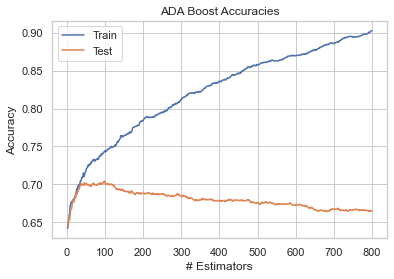

In [784]:
tree = DecisionTreeClassifier(max_depth=3)

boost = AdaBoostClassifier(base_estimator = tree,n_estimators=800, learning_rate=0.05).fit(X_train,y_train)

train_score = list(boost.staged_score(X_train,y_train))
test_score = list(boost.staged_score(X_test,y_test))

x = np.linspace(1,800,800)

plt.plot(x,train_score, label = 'Train')
plt.plot(x,test_score, label = 'Test')
plt.xlabel('# Estimators')
plt.ylabel('Accuracy')
plt.title('ADA Boost Accuracies')
plt.legend()
plt.show()

<div class='exercise-r'>  
 
**4.4** Repeat the plot above for a base learner with depth of (1, 2, 3, 4).
 </div>

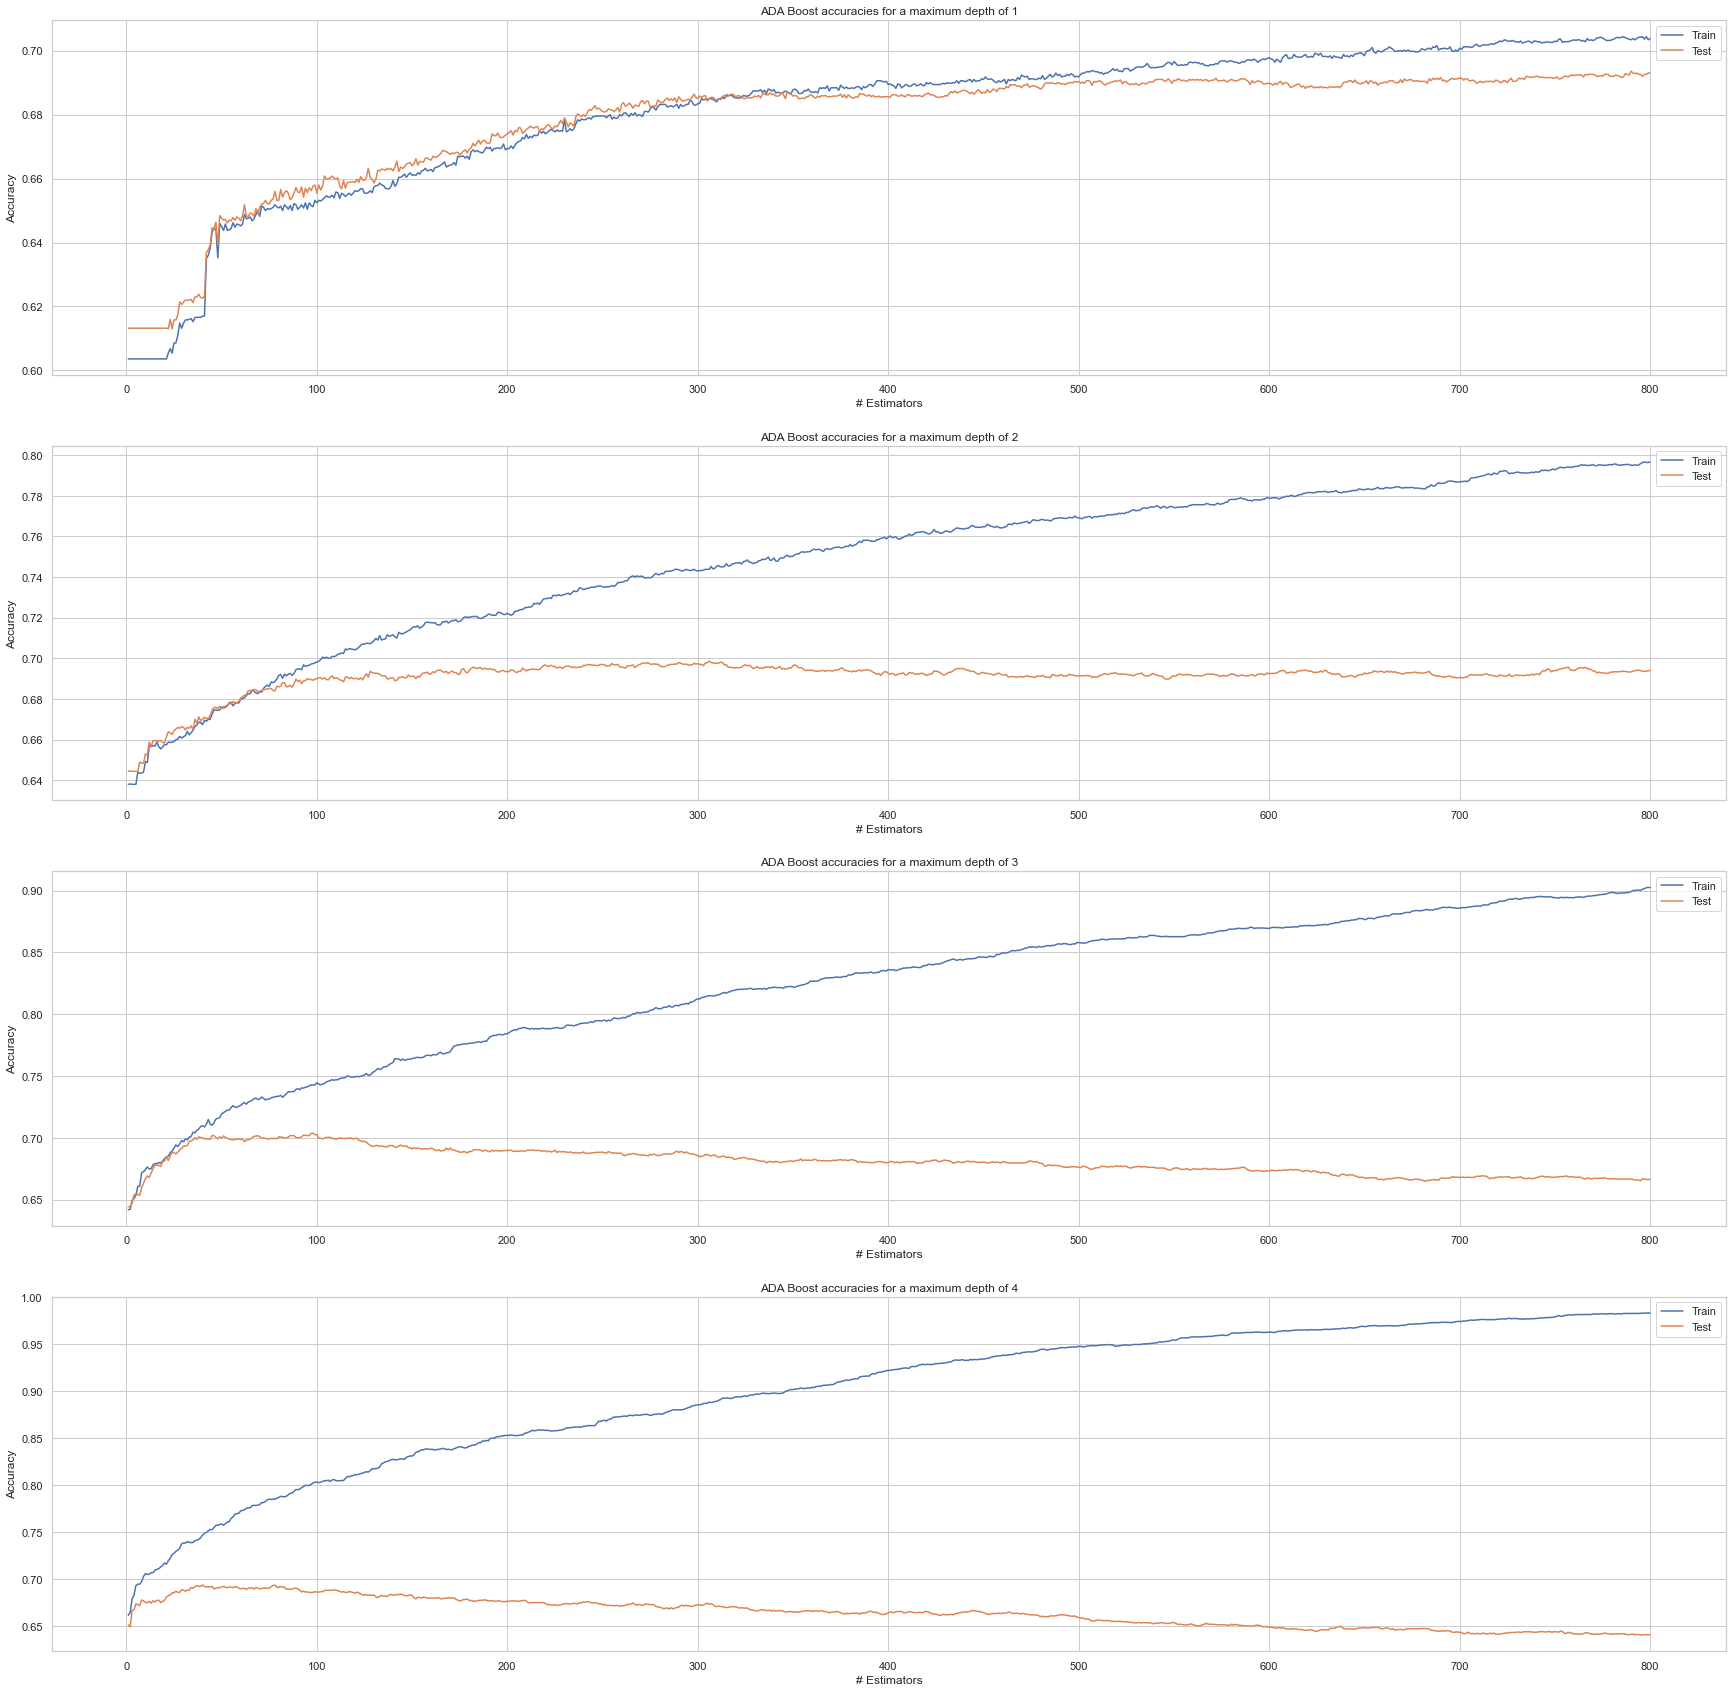

In [796]:
x = np.linspace(1,800,800)

fig, axs = plt.subplots(4,1, figsize=(30, 30))

test_score_list = []

for i in range(1,5):

    tree = DecisionTreeClassifier(max_depth=i)
    
    boost = AdaBoostClassifier(base_estimator = tree,n_estimators=800, learning_rate=0.05).fit(X_train,y_train)

    train_score = list(boost.staged_score(X_train,y_train))
    test_score = list(boost.staged_score(X_test,y_test))
    test_score_list.append(test_score)
        
    axs[i-1].plot(x,train_score, label = 'Train')
    axs[i-1].plot(x,test_score, label = 'Test')
    axs[i-1].set_title('ADA Boost accuracies for a maximum depth of ' + str(i))
    axs[i-1].set_xlabel('# Estimators')
    axs[i-1].set_ylabel('Accuracy')
    axs[i-1].legend()

1) The train accuracies increase as the number of estimators increase.

2) The test accuracies increase until they reach a maximum, then start decreasing.

3) The maximum test score is the highest when max_depth is 3 (slightly above 70%).

4) As the maximum depth increases, the two curves (test and train scores) diverge more, which is to be expected (due to overfitness).

<div class='exercise-r'>  
 
**4.5** Combination of base learner depth and the number of iterations that seems optimal:
 </div>

In [838]:
# I picked the third plot (max_depth = 3) by visual inspection

# To confirm the result:

score = []

for i in range(len(test_score_list)):
    for j in range(len(test_score_list[i])):    
        if (test_score_list[i][j] == np.max(test_score_list[i])):
            score.append(test_score_list[i][j])
            
best_depth = score.index(np.max(score)) + 1

print('Best Tree Depth is: ' + str(best_depth))

for i in range(len(test_score_list[best_depth-1])):
    if(test_score_list[best_depth-1][i] == np.max(test_score_list[best_depth-1])):
        best_score = test_score_list[best_depth-1][i]
        best_iter = i
        
print('Best Number of Iterations is: ' + str(best_iter))
print('Maximum Test Accuracy: ' + str(round(best_score*100,2)))

Best Tree Depth is: 3
Best Number of Iterations is: 97
Maximum Test Accuracy: 70.38


The test accuracy for max_depth = 3 and n_estimators = 97 is the highest compared to all the previous model, therefore this model performs the best and offers better predictions than all other models

<div class='exercise-r'>  
 
**5.1** How do boosting and bagging relate: what is common to both, and what is unique to each?
 
 
 </div>

Boosting and bagging are related by the overall process, in which an average of multiple single-tree models is produced in order to make predictions. However, the main difference is that for bagging, all trees are weighted the same (a simple avergae of all estimators), whereas for boosting, estimators would way differently with each iteration.

<div class='exercise-r'>  
 
**5.2** Reflecting on the overall performance of all of the different classifiers:
 
 </div>

Based on previous results, the best classifiers, in decsending order, are: Boosting, Random forest, Bagging, Single tree with best max_depth (using CV) and then Single tree which overfit the data.

Boosting, RF and bagging have very similar test accuracies, but boosting is still the highest. Their performance is assesed by their ability to produce accurate predictions on the test data set, which would require bias-variance tradeoff. 

Since boosting is an iterative process, in which the model "learns from its mistakes" with each iteration, and given that the number of iterations is high, the point at which the tradeoff between bias and variance is the best can be pinpointed very accurately (compared to the other models), which means it performs better.


<div class='exercise-r'>  
 
**5.3** The impact of having too many trees in boosting and in bagging:
 
 </div>

In boosting, too many trees means the model would overfit, and the testing predictions become worse after a certain number. 

In bagging, increasing the number of trees would also overfit the data, but it also increases the test accuracy (this is what we observed in problem #2). 

Given that boosting also depends heavily on the maximum depth of the trees, we can't be sure of how many trees we need. For example, we have seen in problem #4 that for max_depth = 1, we needed a high number of estimators to reach a decent test accuracy, but for max_depth = 3, we need much less estimators. So, we can't say for certain if increasing the number of trees for boosting would be bad or good, unless we look at the max_depth first. Therefore, in general, it would be worse to have too many trees in the bagging case than in the boosting case.

### End of Notebook